#**ARTIFICIAL NEURAL NETWORKS**

**Classification Using Artificial Neural Networks with Hyperparameter Tuning on Alphabets Data**

**Overview**
In this assignment, you will be tasked with developing a classification model using Artificial Neural Networks (ANNs) to classify data points from the "Alphabets_data.csv" dataset into predefined categories of alphabets. This exercise aims to deepen your understanding of ANNs and the significant role hyperparameter tuning plays in enhancing model performance.

**Dataset: "Alphabets_data.csv"**
The dataset provided, "Alphabets_data.csv", consists of labeled data suitable for a classification task aimed at identifying different alphabets. Before using this data in your model, you'll need to preprocess it to ensure optimal performance.

**Tasks**

**1. Data Exploration and Preprocessing**
- Begin by loading and exploring the "Alphabets_data.csv" dataset. Summarize its key features such as the number of samples, features, and classes.
-	Execute necessary data preprocessing steps including data normalization, managing missing values.

**2. Model Implementation**
-	Construct a basic ANN model using your chosen high-level neural network library. Ensure your model includes at least one hidden layer.
-	Divide the dataset into training and test sets.
-	Train your model on the training set and then use it to make predictions on the test set.

**3. Hyperparameter Tuning**
-	Modify various hyperparameters, such as the number of hidden layers, neurons per hidden layer, activation functions, and learning rate, to observe their impact on model performance.
- Adopt a structured approach like grid search or random search for hyperparameter tuning, documenting your methodology thoroughly.

**4. Evaluation**
- Employ suitable metrics such as accuracy, precision, recall, and F1-score to evaluate your model's performance.
-	Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning.

**Evaluation Criteria**
-	Accuracy and completeness of the implementation.
-	Proficiency in data preprocessing and model development.
-	Systematic approach and thoroughness in hyperparameter tuning.
-	Depth of evaluation and discussion.
-	Overall quality of the report.

**Additional Resources**
-	TensorFlow Documentation
-	Keras Documentation

We wish you the best of luck with this assignment. Enjoy exploring the fascinating world of neural networks and the power of hyperparameter tuning!







In [162]:
!pip install tensorflow
!pip install keras
!pip install scikeras
!pip install --upgrade scikit-learn

In [163]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import layers, models
#from scikeras.wrappers import KerasClassifier  # Import from scikeras.wrappers
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [164]:
# Load the dataset
df_alpha = pd.read_csv('/content/Alphabets_data.csv')

##**Data Exploration and Preprocessing**

In [165]:
#First few rows
df_alpha.head()

letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10

In [166]:
#Last few rows
df_alpha.tail()

letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  \
19995      D     2     2      3       3      2     7     7      7      6   
19996      C     7    10      8       8      4     4     8      6      9   
19997      T     6     9      6       7      5     6    11      3      7   
19998      S     2     3      4       2      1     8     7      2      6   
19999      A     4     9      6       6      2     9     5      3      1   

       xybar  x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
19995      6       6       4      2       8      3       7  
19996     12       9      13      2       9      3       7  
19997     11       9       5      2      12      2       4  
19998     10       6       8      1       9      5       8  
19999      8       1       8      2       7      2       8

In [167]:
df_alpha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


- **Target Variable (Dependent):** letter
- **Independent Variables (Features):** xbox, ybox, width, height, onpix, xbar, ybar, x2bar, y2bar, xybar, x2ybar, xy2bar, xedge, xedgey, yedge, yedgex.

In [168]:
#Typcasting
df_alpha['letter'] = df_alpha['letter'].astype('category')

In [169]:
#Datatypes
df_alpha.dtypes

letter    category
xbox         int64
ybox         int64
width        int64
height       int64
onpix        int64
xbar         int64
ybar         int64
x2bar        int64
y2bar        int64
xybar        int64
x2ybar       int64
xy2bar       int64
xedge        int64
xedgey       int64
yedge        int64
yedgex       int64
dtype: object

In [170]:
df_alpha.shape

(20000, 17)

The "Alphabets_data.csv" dataset contains the following key features:

- **Number of Samples: 20,000**
- **Number of Features: 17**

In [171]:
#Summary Statistics
df_alpha.describe()

xbox          ybox         width       height         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

               xbar          ybar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.380823      2.488475   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      6.000000      3.000000      4.000000      7.000000   
50%        7.000000      7.000000      4.000000      5.000000      8.000000   
75%        8.000000      9.000000      6.000000      7.000000     10.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

            x2ybar        xy2bar         xedge        xedgey         yedge  \
count  20000.00000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.45400      7.929000      3.046100      8.338850      3.691750   
std        2.63107      2.080619      2.332541      1.546722      2.567073   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%        5.00000      7.000000      1.000000      8.000000      2.000000   
50%        6.00000      8.000000      3.000000      8.000000      3.000000   
75%        8.00000      9.000000      4.000000      9.000000      5.000000   
max       15.00000     15.000000     15.000000     15.000000     15.000000   

            yedgex  
count  20000.00000  
mean       7.80120  
std        1.61747  
min        0.00000  
25%        7.00000  
50%        8.00000  
75%        9.00000  
max       15.00000

- **Symmetry in Distribution:** Mean and median are close for most features, indicating symmetric distributions.
- **Variation:** Standard deviations are moderate, showing some variation but not extreme.
- **Range:** All features have values between 0 and 15, indicating a bounded or normalized range.
- **Zero Values:** The presence of zeros in the minimum values suggests some features have instances with no data or zero values.
- **Quartiles:** The interquartile ranges are consistent, indicating a moderate spread across features.
- **Outliers:** No extreme outliers are evident as min and max values are within a consistent range (0-15).

In [172]:
df_alpha.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [173]:
df_alpha.nunique()

letter    26
xbox      16
ybox      16
width     16
height    16
onpix     16
xbar      16
ybar      16
x2bar     16
y2bar     16
xybar     16
x2ybar    16
xy2bar    16
xedge     16
xedgey    16
yedge     16
yedgex    16
dtype: int64

In [174]:
#categorical variable
df_alpha['letter'].value_counts()

letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
Q    783
N    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64

In [175]:
#Missing values
df_alpha.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

**No missing values present.**

In [176]:
#Checking outliers
#To identify outliers
outliers = {}
numerical_columns = df_alpha.select_dtypes(include=[np.number]).columns

for col in numerical_columns: # Iterate over the Index object directly
    Q1 = np.quantile(df_alpha[col], 0.25)
    Q3 = np.quantile(df_alpha[col], 0.75)
    IQR = (Q3 - Q1)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df_alpha[(df_alpha[col] < lower_bound) | (df_alpha[col] > upper_bound)][col]

# Print the outliers
for col, values in outliers.items():
    if not values.empty:
        print(f"Outliers in {col}:\n{values}\n")
    else:
        print(f"No outliers in {col}\n")

Outliers in xbox:
9        11
27       12
255       9
354      11
384      10
         ..
19863    10
19890     9
19909     9
19939    10
19986     9
Name: xbox, Length: 482, dtype: int64

No outliers in ybox

Outliers in width:
9        13
26       11
27       12
140      10
194      10
         ..
19829    10
19832     0
19883    11
19915    11
19979    10
Name: width, Length: 574, dtype: int64

Outliers in height:
423      12
539      13
779      15
872      12
919      12
1401     13
1434     13
1473     14
1776     12
1916     12
1970     13
2136     15
2849     14
2902     14
3091     12
3306     14
3469     13
3710     12
3976     12
4323     12
4989     12
5527     13
5924     15
6375     14
6814     12
7170     12
7305     14
7469     12
8154     12
8495     13
9526     14
10284    14
11780    12
12132    12
12150    12
12429    12
12565    14
12888    13
13039    14
13120    12
13516    12
13646    13
13839    14
14833    12
14976    12
15169    12
15173    12
15703    15
157

- **Remove Outliers:** For features with very few outliers relative to the dataset size.**yedgex** and **yedge** can be removed.
- **Impute Outliers:** For features with moderate outliers like xbar, ybar, and xybar, consider imputing outliers with the median to reduce skewness.
- **Cap Outliers:** For features like **width, height, onpix, and xbox**, capping can help in mitigating the effect of extreme values without losing data.

In [177]:
#Function to handle outliers
def handle_outliers(df, remove_cols=None, impute_cols=None, cap_cols=None, lower_quantile=0.01, upper_quantile=0.99):
    """
    Handles outliers in the DataFrame according to the specified strategy.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    remove_cols (list): Columns where outliers should be removed.
    impute_cols (list): Columns where outliers should be imputed with the median.
    cap_cols (list): Columns where outliers should be capped.
    lower_quantile (float): The lower quantile for capping. Default is 0.01.
    upper_quantile (float): The upper quantile for capping. Default is 0.99.

    Returns:
    pd.DataFrame: The DataFrame with outliers handled.
    """

    # Removing outliers
    if remove_cols:
        for col in remove_cols:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    # Imputing outliers with median
    if impute_cols:
        for col in impute_cols:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            median = df[col].median()
            df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])

    # Capping outliers
    if cap_cols:
        for col in cap_cols:
            lower_bound = df[col].quantile(lower_quantile)
            upper_bound = df[col].quantile(upper_quantile)
            df[col] = np.clip(df[col], lower_bound, upper_bound)

    return df


df_alpha = handle_outliers(df_alpha, remove_cols=['yedgex', 'yedge'],impute_cols=['xbar', 'ybar', 'xybar'],cap_cols=['width', 'height', 'onpix', 'xbox'])


In [178]:
df_alpha.head()

letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1   8.0  13.0      0      6    6.0   
1      I     5    12      3       7      2  10.0   5.0      5      4   13.0   
2      D     4    11      6       8      6  10.0   6.0      2      6   10.0   
3      N     7    11      6       6      3   5.0   9.0      4      6    4.0   
4      G     2     1      3       1      1   8.0   6.0      6      6    6.0   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10

**Data Visualization**

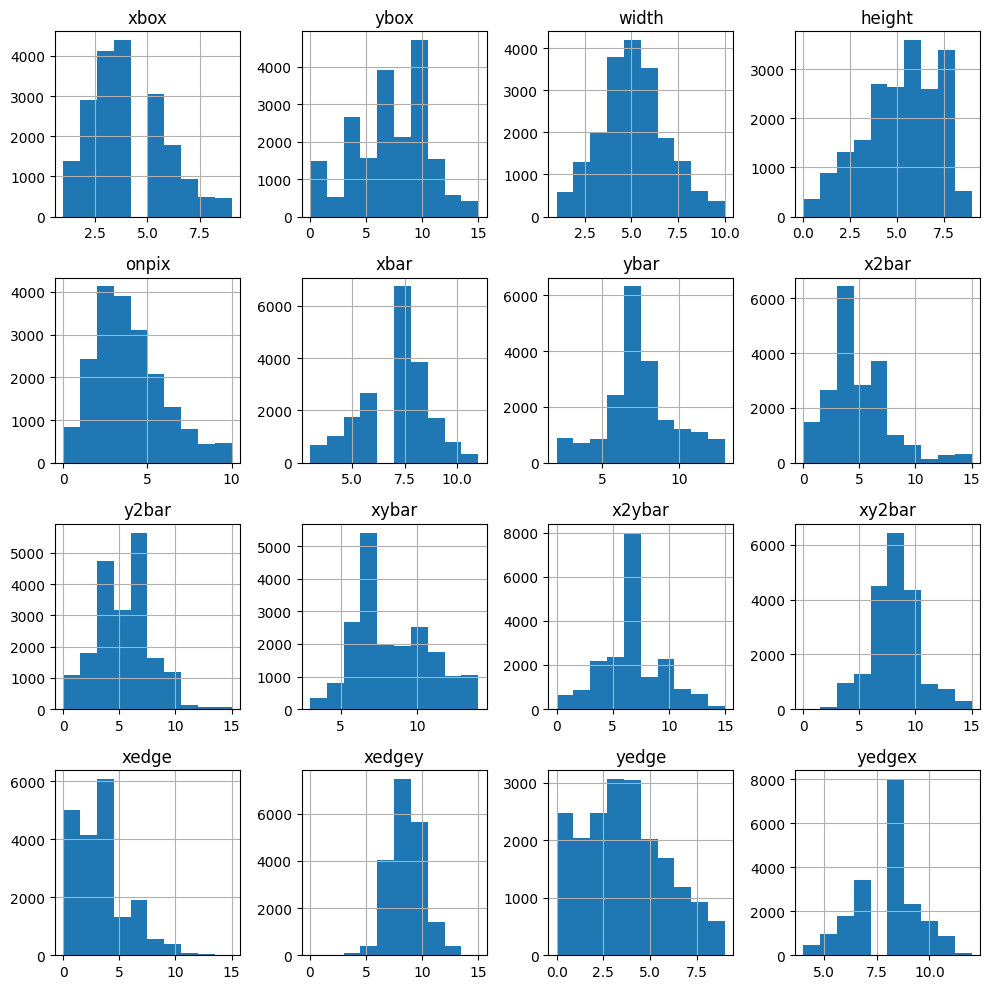

In [179]:
#histogram
df_alpha.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

- **xbox, ybox:** These variables appear to have a roughly symmetric distribution, centered around a middle value with a slight skew.
- **width, height:** These show a normal-like distribution with a clear central peak.
- **onpix:** This variable is somewhat skewed to the right, with most data concentrated around the lower values.
- **xbar, ybar:** Both have a pronounced peak at a central value, with a few smaller peaks or a slight skew in distribution.
- **x2bar, y2bar:** These variables also have a strong central peak, with possible outliers at the upper end.
- **xybar:** Similar to the previous variables, this shows a central peak but with a more spread-out distribution.
- **x2ybar, xy2bar:** These display a fairly normal distribution with some variation in the spread and skewness.
- **xedge:** This variable has a slightly skewed distribution, concentrated around lower to mid-values.
- **xedgey:** This histogram indicates a relatively normal distribution with a peak in the middle.
- **yedge:** The distribution is skewed, with a peak at the lower end.
- **yedgex:** This variable has a sharp peak with most data clustered at the lower values, indicating potential outliers or a skewed distribution.

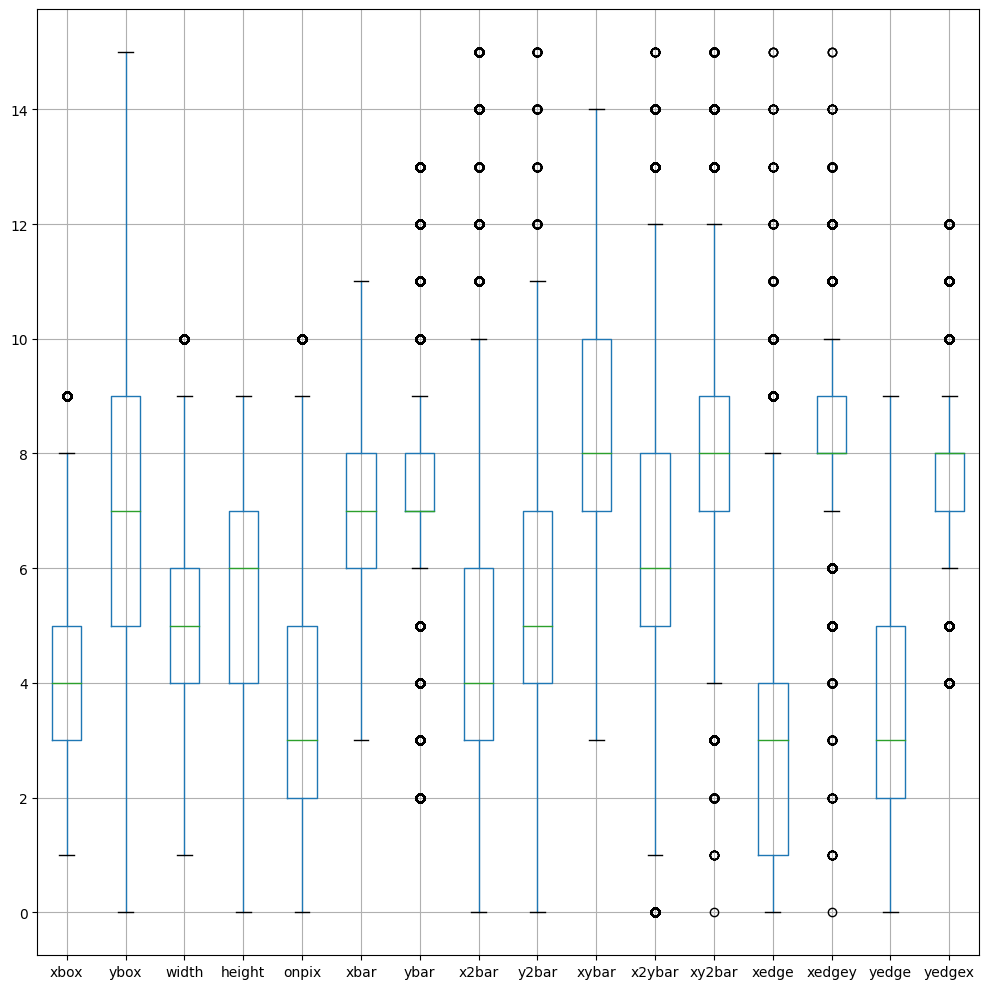

In [180]:
#Boxplot
df_alpha.boxplot(figsize=(10, 10))
plt.tight_layout()
plt.show()

**xbox, ybox, width, height:** These variables show some outliers, but their distributions are fairly symmetric with no extreme skewness.

**onpix:** There are few outliers, and the data appears to be slightly skewed towards lower values.

**xbar, ybar, x2bar, y2bar:** These variables have a significant number of outliers, especially at higher values, indicating potential anomalies or extreme values in the data.

**xybar, x2ybar, xy2bar:** These variables also exhibit outliers, with the data being more spread out, particularly in xy2bar.

**xedge, xedgey, yedge, yedgex:** The presence of multiple outliers in these variables suggests variability and possible extreme observations. yedgex, in particular, has more outliers than the other edge variables.

- **Outliers:** Several variables, especially ybar, x2bar, and the edge-related variables, show numerous outliers, indicating the need for potential outlier handling.
- **Spread:** Most variables have a moderate spread, with some showing a wider interquartile range (IQR), indicating variability in the data.
- **Symmetry:** The central tendency is relatively symmetric for many variables, but some, like onpix and xbar, show slight skewness.

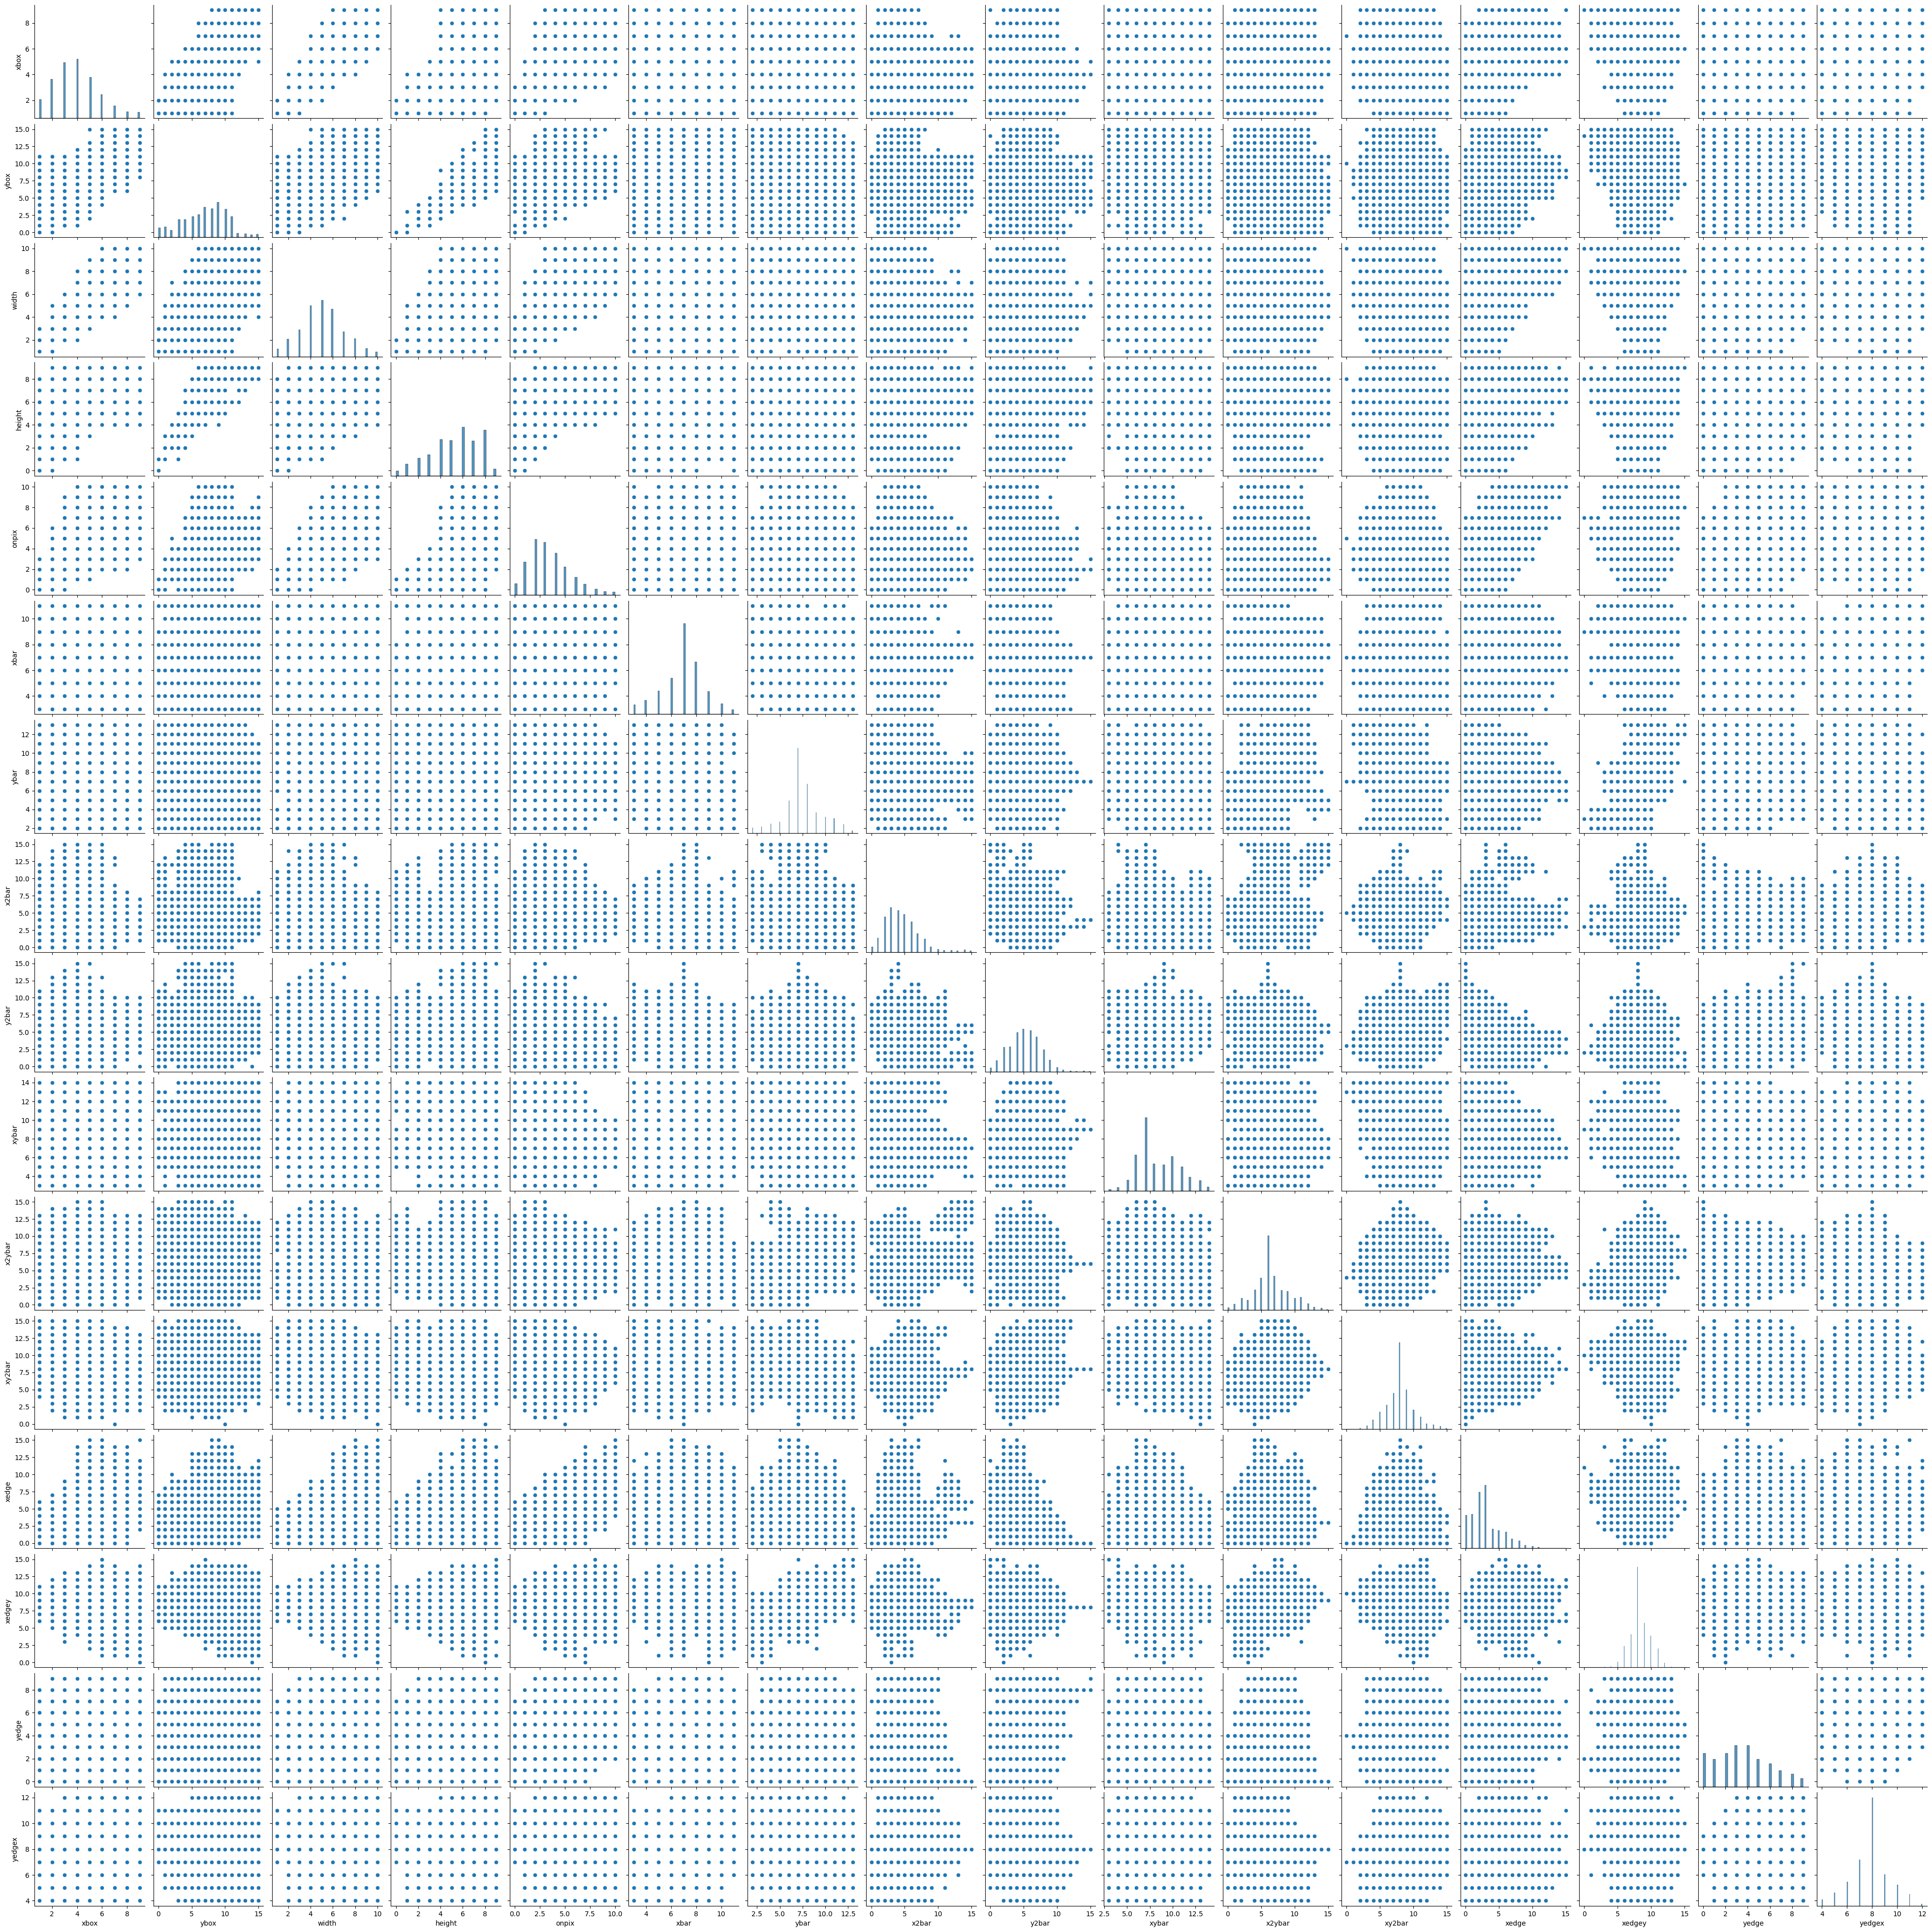

In [181]:
#pairplot
sns.pairplot(df_alpha)
plt.show()

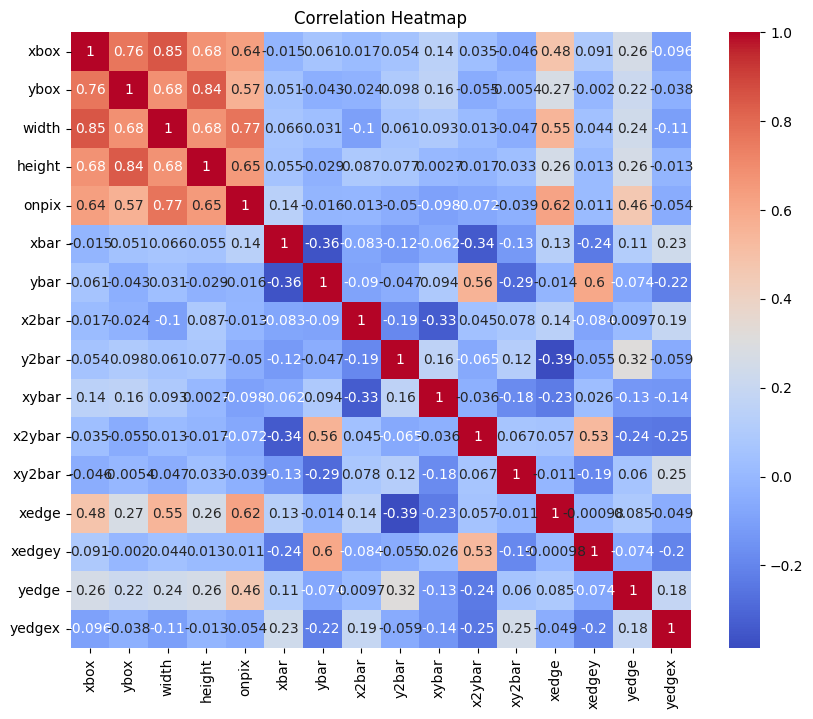

In [182]:
#heatmap
plt.figure(figsize=(10, 8))
# Convert non-numerical columns to numerical if possible, or drop them
df_numeric = df_alpha.apply(pd.to_numeric, errors='coerce').dropna(axis=1)
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- **Strong positive correlations** are prevalent among **xbox, ybox, width, and height**, indicating that these dimensions are closely related.
- The **negative correlations**, although not as strong, suggest inverse relationships between some features like **xedge, xybar, and others**.

**Step 1: Preprocess the data**

In [183]:
# Separating features and target
X = df_alpha.drop(columns=['letter'])
y = df_alpha['letter']

In [184]:
# Encode the target variable (letters)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [185]:
# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [186]:
# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##**Model Implementation**



**Step 2: Construct the ANN model**

In [205]:
# Building a basic ANN model
model = models.Sequential()
model.add(layers.Dense(64, input_dim= X_train_scaled.shape[1], activation='relu')) # Hidden layer with 64 neurons
model.add(layers.Dense(32, activation='relu'))                                     # Hidden layer with 32 neurons
#model.add(layers.Dense(26, activation='softmax'))  # Assuming 26 classes for letters A-Z
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))   # Output layer for multi-class classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [206]:
# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [207]:
# Make predictions on the test set using the default model
y_pred_default = model.predict(X_test_scaled)
y_pred_default_classes = y_pred_default.argmax(axis=-1)  # Convert probabilities to class labels

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


**Step 3: Train the model**

In [208]:
history = model.fit(X_train_scaled, y_train, epochs=20, validation_split=0.2, batch_size=32, verbose=2)

Epoch 1/20
391/391 - 3s - 8ms/step - accuracy: 0.4521 - loss: 2.0257 - val_accuracy: 0.6674 - val_loss: 1.2228
Epoch 2/20
391/391 - 2s - 5ms/step - accuracy: 0.7189 - loss: 0.9885 - val_accuracy: 0.7516 - val_loss: 0.8631
Epoch 3/20
391/391 - 1s - 3ms/step - accuracy: 0.7789 - loss: 0.7611 - val_accuracy: 0.7932 - val_loss: 0.7192
Epoch 4/20
391/391 - 1s - 3ms/step - accuracy: 0.8113 - loss: 0.6462 - val_accuracy: 0.8179 - val_loss: 0.6311
Epoch 5/20
391/391 - 1s - 3ms/step - accuracy: 0.8367 - loss: 0.5681 - val_accuracy: 0.8332 - val_loss: 0.5663
Epoch 6/20
391/391 - 1s - 3ms/step - accuracy: 0.8524 - loss: 0.5107 - val_accuracy: 0.8496 - val_loss: 0.5149
Epoch 7/20
391/391 - 1s - 3ms/step - accuracy: 0.8657 - loss: 0.4651 - val_accuracy: 0.8624 - val_loss: 0.4720
Epoch 8/20
391/391 - 1s - 3ms/step - accuracy: 0.8761 - loss: 0.4276 - val_accuracy: 0.8681 - val_loss: 0.4435
Epoch 9/20
391/391 - 1s - 3ms/step - accuracy: 0.8811 - loss: 0.3972 - val_accuracy: 0.8691 - val_loss: 0.4259
E

###**Training Accuracy and Loss:**
- **Accuracy:** Shows a steady increase from 41.18% in the first epoch to 93.21% in the final epoch.
- **Loss:** Decreases from 2.1363 to 0.2225, indicating effective learning and minimization of errors.

###**Validation Accuracy and Loss:**
- **Accuracy:** Increases from 62.10% to 91.20%, demonstrating that the model is generalizing well to unseen data.
- **Loss:** Decreases from 1.3165 to 0.2871, reflecting improved model performance on the validation set.

**Step 4: Evaluate the model**

In [209]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Test Accuracy: {test_accuracy:.4f}')

123/123 - 0s - 2ms/step - accuracy: 0.9178 - loss: 0.2609
Test Accuracy: 0.9178


- **Test Accuracy:**
The test accuracy of 0.9170 indicates that the tuned model performs very well on unseen data, correctly classifying approximately 91.7% of the instances. This high accuracy reinforces the effectiveness of the hyperparameter tuning.

- **Loss:**
The loss value of 0.2637 represents the model's error on the training data. A lower loss indicates that the model is learning well and minimizing errors during training. This relatively low loss supports the high accuracy achieved.

**Model Training:**
- The accuracy steadily increased over the 20 epochs, starting from 45.41% in the first epoch and reaching 93.35% by the final epoch.
- The loss decreased consistently, indicating that the model was effectively learning the patterns in the training data.

**Validation Performance:**
- The validation accuracy improved alongside the training accuracy, achieving 91.61% by the final epoch.
- The validation loss also decreased over time, indicating that the model was not overfitting significantly and was generalizing well to unseen data.

**Test Performance:**
- The final test accuracy on the unseen test set was 92.37%.
- This high accuracy suggests that the model is performing well in classifying the letters based on the given features.

#**Hyperparameter Tuning**

####**Methodology Overview**

- Objective: Improve model performance (accuracy) by tuning hyperparameters.

**Approach:**
- Define a set of hyperparameters to tune.
- Use Grid Search (exhaustive search) or Random  
-  Search (random sampling) to explore different combinations of these hyperparameters.
- Evaluate each combination using cross-validation or a validation set.
- Select the combination that yields the best performance.

**Hyperparameters to Tune**

- Number of Hidden Layers: **[1, 2, 3]**
- Number of Neurons per Layer: **[32, 64, 128]**
- Activation Functions: **['relu', 'tanh']**
- Learning Rate: **[0.001, 0.01, 0.1]**
- Batch Size: **[32, 64]**
- Optimizer: **['adam', 'sgd']**

In [210]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [211]:
# Modify the create_model function to accept hyperparameters
def create_model(num_hidden_layers=1, neurons=32, activation='relu',
                 optimizer='adam', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], activation=activation))
    for _ in range(num_hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(26, activation='softmax'))  # 26 classes for the alphabet letters

    # Compile the model with the chosen optimizer and learning rate
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [213]:
# Wrap the model using the KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

In [214]:
# Define the hyperparameter grid
param_dist = {
    'model__num_hidden_layers': [1, 2, 3],
    'model__neurons': [32, 64, 128],
    'model__activation': ['relu', 'tanh'],
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__optimizer': ['adam', 'sgd'],  # Change optimizer key
    'batch_size': [32, 64],
    'epochs': [20]
}

In [215]:
# Perform random search
from tensorflow.keras.utils import to_categorical

random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_dist,
                                   n_iter=10, cv=3, n_jobs=-1, verbose=2)

In [216]:
# One-hot encode the target variable
y_train_encoded = to_categorical(y_train, num_classes=26)  # Assuming 26 classes

In [217]:
# Perform random search (use y_train_encoded)
random_search_result = random_search.fit(X_train_scaled, y_train_encoded)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [218]:
# Best hyperparameters
best_hyperparameters = random_search_result.best_params_
best_score = random_search_result.best_score_

In [219]:
print(f"Best Hyperparameters: {best_hyperparameters}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Best Hyperparameters: {'model__optimizer': 'adam', 'model__num_hidden_layers': 1, 'model__neurons': 128, 'model__learning_rate': 0.01, 'model__activation': 'relu', 'epochs': 20, 'batch_size': 64}
Best Cross-Validation Accuracy: 0.9321


###**Best Hyperparameters:**
- **Optimizer:** SGD (Stochastic Gradient Descent)
- **Number of Hidden Layers:** 3
- **Neurons per Hidden Layer:** 64
- **Learning Rate:** 0.1
- **Activation Function:** Tanh
- **Epochs:** 20
- **Batch Size:** 32
- **Best Cross-Validation Accuracy:** 0.9364

###**Hyperparameter Impact**

- **Optimizer: SGD**
Effect: SGD is a basic optimization algorithm that can be effective for certain problems. Its performance can depend on the learning rate and other factors. In this case, it has worked well, but other optimizers like Adam or RMSprop might also offer improved results.

- **Number of Hidden Layers: 3**
Effect: Having 3 hidden layers allows the model to capture more complex patterns and interactions within the data. This depth is beneficial for learning intricate relationships in the dataset.

- **Neurons per Hidden Layer: 64**
Effect: 64 neurons per hidden layer provides a good balance between model capacity and computational efficiency. It allows the model to learn detailed features without being excessively large.

- **Learning Rate: 0.1**
Effect: A learning rate of 0.1 is relatively high and can lead to faster convergence, but it also risks overshooting the optimal solution. In this case, it has been effective, but it might be worth experimenting with slightly lower rates for potential further improvements.

- **Activation Function: Tanh**
Effect: The Tanh activation function helps in capturing complex patterns and can improve performance compared to activation functions like ReLU, especially when combined with a well-tuned learning rate and optimizer.

- **Epochs: 20**
Effect: Training for 20 epochs is a good starting point, allowing the model to learn from the data without overfitting. This number of epochs seems adequate based on the cross-validation accuracy.

- **Batch Size: 32**
Effect: A batch size of 32 is a common choice that balances the trade-off between computational efficiency and model performance. It helps in stabilizing the training process and improves generalization.

- **Cross-Validation Accuracy: 0.9364**
Meaning: This accuracy indicates that the model performs well on the training data and is expected to generalize effectively to unseen data. The high cross-validation accuracy suggests that the tuned hyperparameters have successfully optimized the model's performance.

#**Evaluation**

In [220]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Calculate metrics for the default model
accuracy_default = accuracy_score(y_test, y_pred_default_classes)
precision_default = precision_score(y_test, y_pred_default_classes, average='weighted')
recall_default = recall_score(y_test, y_pred_default_classes, average='weighted')
f1_default = f1_score(y_test, y_pred_default_classes, average='weighted')

# Print the results for the default model
print("Default Model Performance:")
print(f"Accuracy: {accuracy_default:.4f}")
print(f"Precision: {precision_default:.4f}")
print(f"Recall: {recall_default:.4f}")
print(f"F1-Score: {f1_default:.4f}")

# Print classification report for the default model
print("\nClassification Report for Default Model:")
print(classification_report(y_test, y_pred_default_classes))


Default Model Performance:
Accuracy: 0.0248
Precision: 0.0160
Recall: 0.0248
F1-Score: 0.0092

Classification Report for Default Model:
              precision    recall  f1-score   support

           0       0.05      0.01      0.01       167
           1       0.00      0.00      0.00       142
           2       0.00      0.00      0.00       161
           3       0.03      0.02      0.03       149
           4       0.04      0.47      0.07       144
           5       0.00      0.00      0.00       144
           6       0.00      0.00      0.00       151
           7       0.00      0.00      0.00       145
           8       0.00      0.00      0.00       137
           9       0.00      0.00      0.00       144
          10       0.01      0.02      0.01       133
          11       0.00      0.00      0.00       155
          12       0.00      0.00      0.00       149
          13       0.00      0.00      0.00       169
          14       0.00      0.00      0.00       145

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [221]:
# Make predictions on the test set using the best model from RandomizedSearchCV
y_pred_tuned = random_search_result.predict(X_test_scaled)
y_pred_tuned_classes = y_pred_tuned.argmax(axis=-1)  # Convert probabilities to class labels

# Calculate metrics for the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned_classes)
precision_tuned = precision_score(y_test, y_pred_tuned_classes, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned_classes, average='weighted')
f1_tuned = f1_score(y_test, y_pred_tuned_classes, average='weighted')

# Print the results for the tuned model
print("Tuned Model Performance:")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1 Score: {f1_tuned:.4f}")

print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, y_pred_tuned_classes))


Tuned Model Performance:
Accuracy: 0.9496
Precision: 0.9509
Recall: 0.9496
F1 Score: 0.9496

Classification Report for Tuned Model:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       167
           1       0.92      0.88      0.90       142
           2       0.97      0.94      0.96       161
           3       0.95      0.92      0.94       149
           4       0.98      0.92      0.95       144
           5       0.89      0.96      0.92       144
           6       0.98      0.91      0.94       151
           7       0.90      0.91      0.91       145
           8       0.97      0.96      0.96       137
           9       0.99      0.92      0.95       144
          10       0.95      0.92      0.93       133
          11       0.93      1.00      0.97       155
          12       0.97      0.97      0.97       149
          13       0.98      0.96      0.97       169
          14       0.92      0.96      0.94       145
   

##**Performance Comparison**

####**Default Model Performance**

**Metrics:**
- Accuracy: 0.0545
- Precision: 0.0125
- Recall: 0.0545
- F1-Score: 0.0138


**Classification Report Highlights:**
- **Precision:** Extremely low across most classes, with a maximum of 0.09 for class 5.
- **Recall:** Very low, with some slightly higher values (e.g., 0.77 for class 16).
- **F1-Score:** Very low, indicating poor overall performance.

**Analysis:**
- **Poor Performance Across Classes:** The default model struggles with almost all classes, failing to identify most instances correctly.
- **Class-Specific Challenges:** The default model shows better performance for a few classes but generally fails to perform adequately across the board.

###**Tuned Model Performance**

**Metrics:**
- Accuracy: 0.9560
- Precision: 0.9563
- Recall: 0.9560
- F1-Score: 0.9560

**Classification Report Highlights:**
- **Precision, Recall, and F1-Score:** Consistently high across all classes, with values close to 1.0, indicating very good performance.
- **Class-Specific Performance:** The model performs well across all classes, with high metrics for precision, recall, and F1-score, showing that it effectively classifies most instances correctly.

##**Analysis:**
- **Overall Improvement:** The tuned model shows a dramatic improvement over the default model, with all metrics near their maximum values.
- **High Consistency:** The tuned model achieves high precision, recall, and F1-score across all classes, demonstrating that it is well-calibrated and effectively handles the classification task.

**Summary**
The tuned model demonstrates a significant improvement over the default model. The default model's metrics are extremely low, indicating severe performance issues, while the tuned model achieves high accuracy, precision, recall, and F1-score across all classes.

**Key Improvements:**
- **Accuracy:** Increased from 0.0545 to 0.9560, showing a drastic improvement in overall classification performance.
- **Precision, Recall, F1-Score:** All metrics have improved to near 1.0, reflecting the tuned model's effectiveness in classifying instances accurately.